<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Parcial2/TierraLuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
G = 6.61e-11
Mt = 5.972e24
Ml = 7.346e22
R = 384400000
# Constante para cambiar de unidades
K = G*Mt/R**2
print(K)

# En las otras unidades
MTierra = 1
MLuna = Ml/Mt
print(MTierra,MLuna)

0.0026714958295480018
1 0.012300736771600804


In [ ]:
rt = np.array([0.,0.])
theta = np.pi*45/180
rl = np.array([np.cos(theta),np.sin(theta)])

In [ ]:
def GetPotencial(x,y):

    r = np.array([x,y])

    Rt = r - rt
    Rl = r - rl

    V = - MTierra / np.linalg.norm(Rt)
    V += - MLuna / np.linalg.norm(Rl)

    return V

In [ ]:
def GetField(x,y):

    r = np.array([x,y])
    # Vector relativo a la tierra
    Rt = r - rt
    # Vector relativo a la luna
    Rl = r - rl

    F = -Rt * MTierra / np.linalg.norm(Rt)**3
    F += -Rl * MLuna / np.linalg.norm(Rl)**3

    return F

In [ ]:
P = np.array([0.60,0.65])
F0 = GetField(P[0],P[1])
V0 = GetPotencial(P[0],P[1])
print(V0,F0)

-1.2318077566509542 [-0.13008015 -0.54623828]


In [ ]:
def GetEquipotenciales(x0,y0, N = 6000, dl = 0.0001):

    x = np.zeros(N)
    y = np.zeros_like(x)
    V = np.zeros_like(x)

    x[0] = x0
    y[0] = y0
    V[0] = GetPotencial(x0,y0)

    for i in range(1,N):

        F = GetField(x[i-1],y[i-1])

        # Iteramos la curva de nivel
        x[i] = x[i-1] - dl*F[1]/np.linalg.norm(F)
        y[i] = y[i-1] + dl*F[0]/np.linalg.norm(F)

        V[i] = GetPotencial(x[i],y[i])

    return x,y,V

In [ ]:
x,y,V = GetEquipotenciales(P[0],P[1])

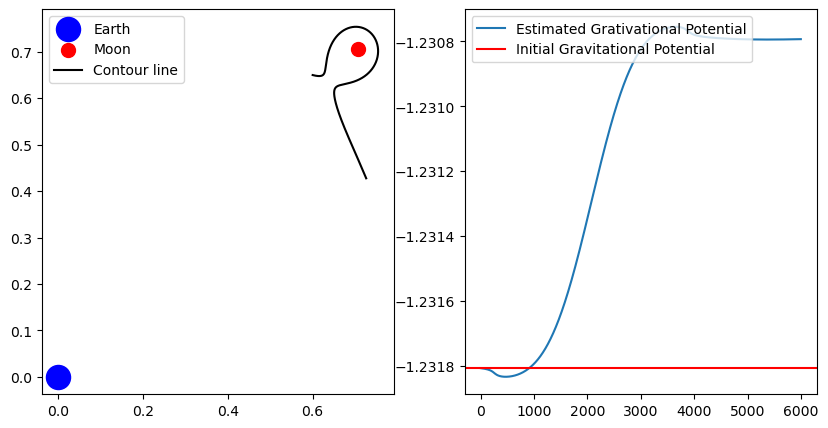

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.scatter(rt[0],rt[1],color='b',s=300,label='Earth')
ax.scatter(rl[0],rl[1],color='r',s=100,label='Moon')
ax.plot(x,y,color='k',label='Contour line')

ax1.plot(V,label='Estimated Grativational Potential')
ax1.axhline(y=V0,color='r', label='Initial Gravitational Potential')
ax.legend(loc='upper left')
ax1.legend(loc='upper left')